In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
transfer = df[df['type']=='TRANSFER']
transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0


In [4]:
transfer.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.0,0.0,1,0


In [5]:
transfer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532909 entries, 2 to 6362618
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            532909 non-null  int64  
 1   type            532909 non-null  object 
 2   amount          532909 non-null  float64
 3   nameOrig        532909 non-null  object 
 4   oldbalanceOrg   532909 non-null  float64
 5   newbalanceOrig  532909 non-null  float64
 6   nameDest        532909 non-null  object 
 7   oldbalanceDest  532909 non-null  float64
 8   newbalanceDest  532909 non-null  float64
 9   isFraud         532909 non-null  int64  
 10  isFlaggedFraud  532909 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 48.8+ MB


In [6]:
transfer.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,532909.000000,5.329090e+05,5.329090e+05,5.329090e+05,5.329090e+05,5.329090e+05,532909.000000,532909.000000
mean,246.657304,9.106470e+05,5.444185e+04,1.028816e+04,2.567606e+06,3.554567e+06,0.007688,0.000030
std,145.015876,1.879574e+06,4.399818e+05,2.623603e+05,6.037846e+06,7.387614e+06,0.087344,0.005479
min,1.000000,2.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,2.159054e+05,0.000000e+00,0.000000e+00,2.249354e+05,7.536934e+05,0.000000,0.000000
50%,250.000000,4.863084e+05,0.000000e+00,0.000000e+00,1.015903e+06,1.725375e+06,0.000000,0.000000
75%,346.000000,9.749580e+05,2.626600e+04,0.000000e+00,2.753798e+06,3.795986e+06,0.000000,0.000000
max,743.000000,9.244552e+07,5.958504e+07,4.958504e+07,3.553805e+08,3.560159e+08,1.000000,1.000000


In [7]:
transfer.shape

(532909, 11)

C:\Users\ethan\AppData\Local\Temp\ipykernel_12932\4061998094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=transfer, x='isFraud', palette='pastel')


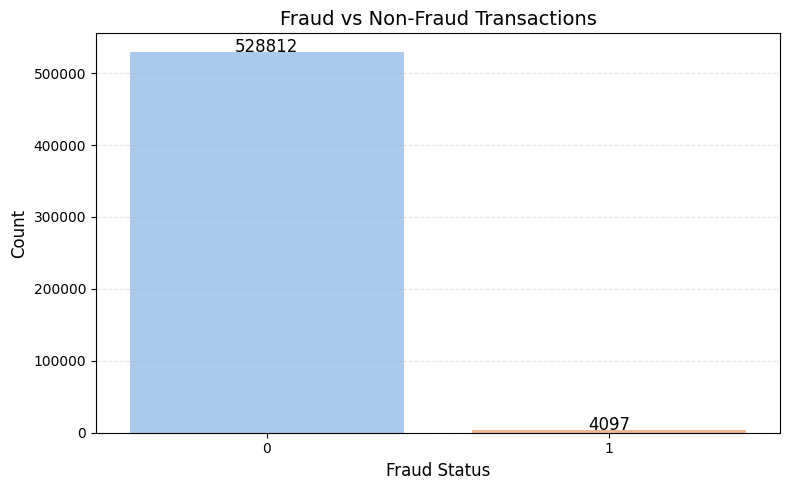

In [5]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=transfer, x='isFraud', palette='pastel')

# Add the numbers manually using plt.text
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 100, f'{count}', ha='center', color='black', fontsize=12)

# Set titles and labels
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14, color='black')
plt.xlabel('Fraud Status', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_17012\3920060884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer['balanceDiffOrig'] = transfer['oldbalanceOrg'] - transfer['newbalanceOrig']
C:\Users\ethan\AppData\Local\Temp\ipykernel_17012\3920060884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer['balanceDiffDest'] = transfer['newbalanceDest'] - transfer['oldbalanceDest']


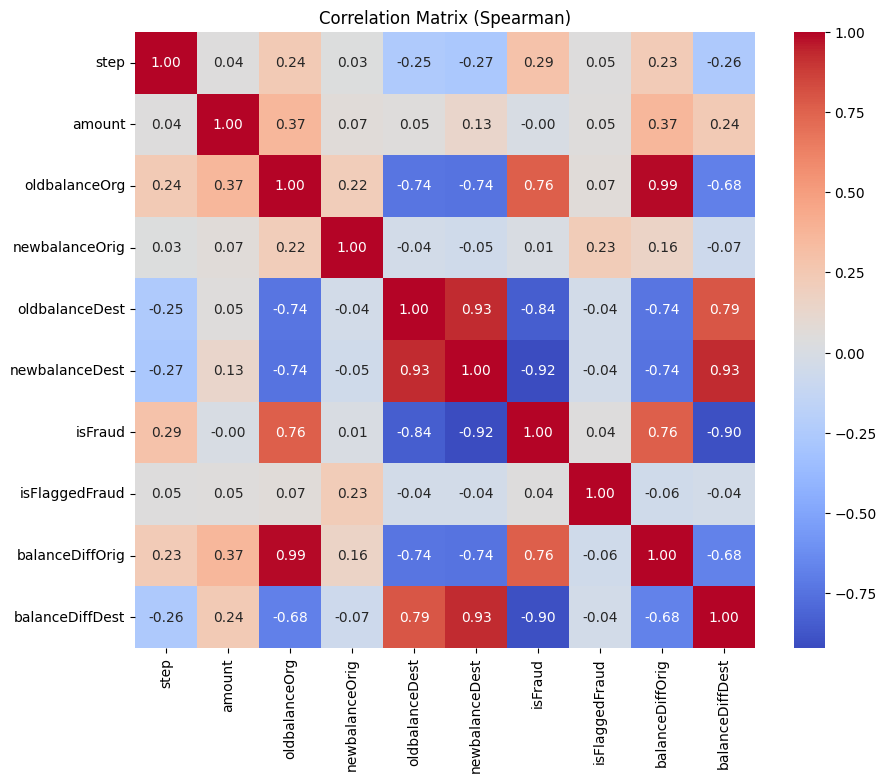

In [4]:
# Compute balance differences
transfer['balanceDiffOrig'] = transfer['oldbalanceOrg'] - transfer['newbalanceOrig'] 
transfer['balanceDiffDest'] = transfer['newbalanceDest'] - transfer['oldbalanceDest']
#splinting the data in fraud and not fraud
fraud_data = transfer[transfer['isFraud'] == 1]
non_fraud_data = transfer[transfer['isFraud'] == 0]

# Random sampling while maintaining class proportions
# This is especially useful for dealing with imbalanced datasets in a controlled manner.
non_fraud_sample = non_fraud_data.sample(n=len(fraud_data), random_state=42)

#Concat the balanced sample
balanced_df = pd.concat([fraud_data, non_fraud_sample])

#calculating the spearman correlation, just to be sure
# We use Spearman correlation to verify the relationship between numeric variables,
# as it is more robust to non-linear relationships compared to Pearson correlation.
spearman_correlation = balanced_df.select_dtypes(include=['float64', 'int64']).corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Spearman)")
plt.show()

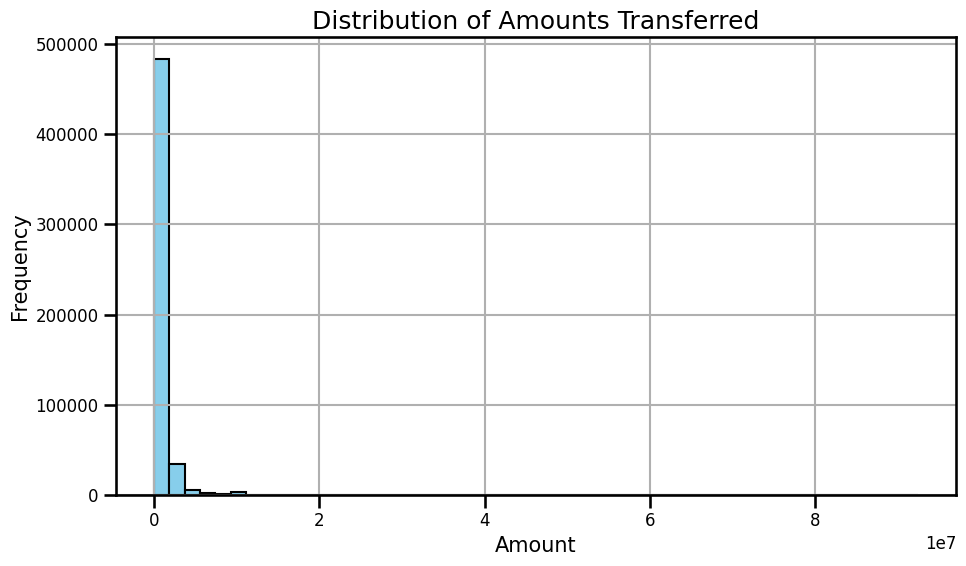

In [7]:
# Maximum amount transferred
max_amount = transfer['amount'].max()

# Minimum amount transferred
min_amount = transfer['amount'].min()

# Disable 'use_inf_as_null' option to avoid the error
sns.set_context("talk", rc={"axes.labelsize": 15, "axes.titlesize": 18, "xtick.labelsize": 12, "ytick.labelsize": 12})

# Plot histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(transfer['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Amounts Transferred')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

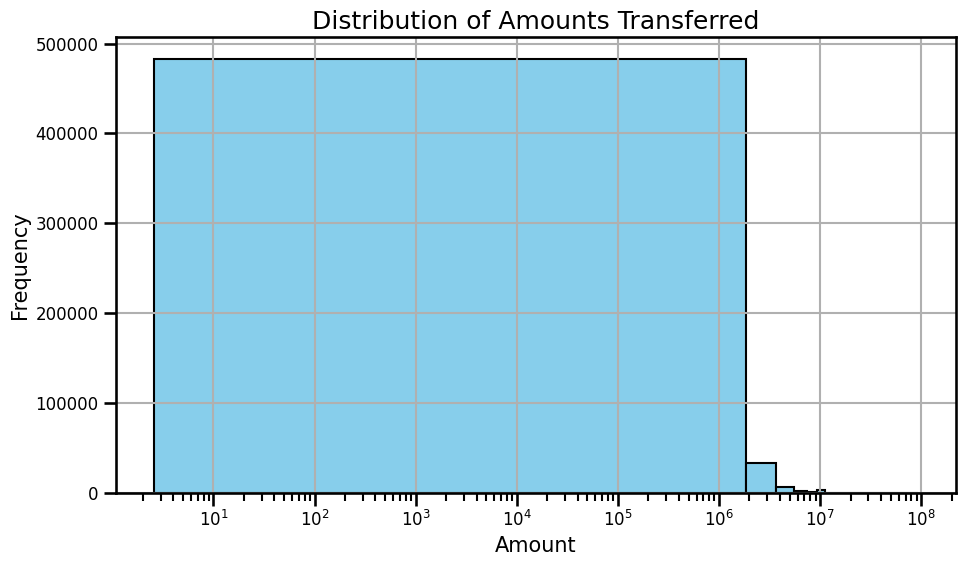

In [16]:
import matplotlib.pyplot as plt

# Plot histogram with a logarithmic scale on the x-axis
plt.figure(figsize=(10, 6))
plt.hist(transfer['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Amounts Transferred')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Use logarithmic scale to compress the scale
plt.xscale('log')

plt.grid(True)
plt.tight_layout()
plt.show()

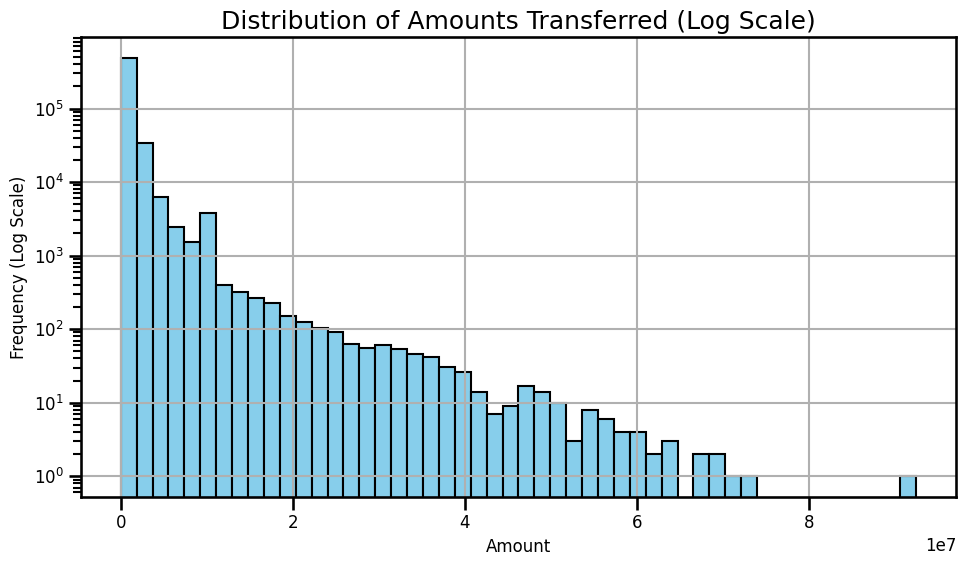

In [14]:
import matplotlib.pyplot as plt

# Plot histogram with a logarithmic scale on the y-axis
plt.figure(figsize=(10, 6))
plt.hist(transfer['amount'], bins=50, color='skyblue', edgecolor='black')

# Log scale on the y-axis to make differences more visible
plt.yscale('log')

plt.title('Distribution of Amounts Transferred (Log Scale)')
plt.xlabel('Amount', fontsize=12, color='black')
plt.ylabel('Frequency (Log Scale)', fontsize=12, color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(True)
plt.tight_layout()
plt.show()

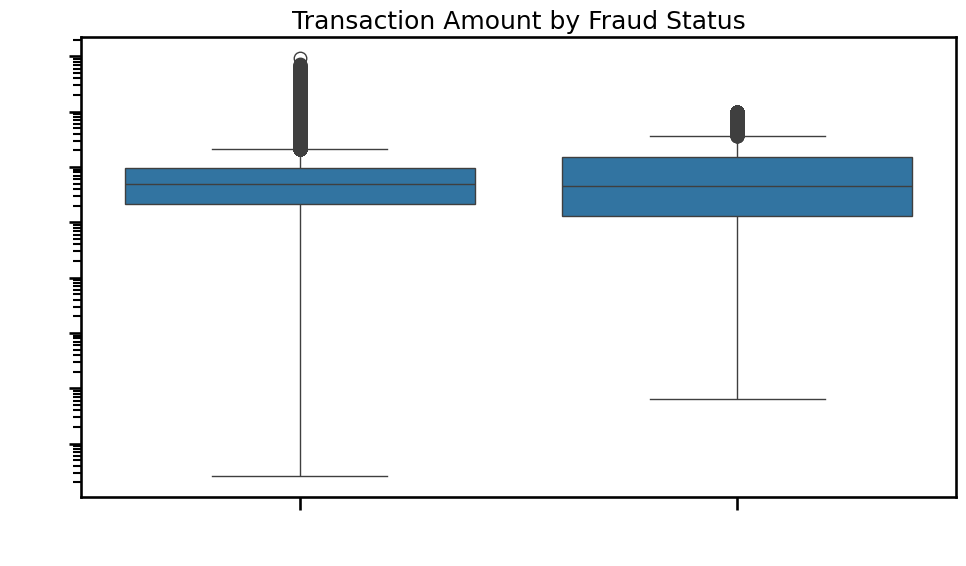

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=transfer)
plt.title('Transaction Amount by Fraud Status')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Fraud Status', fontsize=12, color='white')
plt.ylabel('Amount', fontsize=12, color='white')
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()

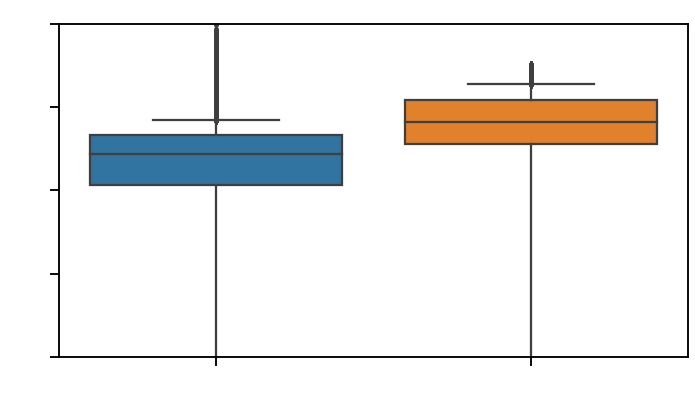

In [ ]:
# Create the boxplot with the previous figure size
plt.figure(figsize=(10, 6))  # Original size

# Create the boxplot
sns.boxplot(x='isFraud', y='amount', data=transfer)

# Title and axis labels
plt.title('Transaction Amount by Fraud Status', fontsize=14, color='white')
plt.xlabel('Fraud Status', fontsize=12, color='white')
plt.ylabel('Amount (Log Scale)', fontsize=12, color='white')

# Adjusting ticks color
plt.xticks(color='white')
plt.yticks(color='white')

# Apply log scale to y-axis for better visibility
plt.yscale('log')

# Adjust the y-axis limits to make the scale more visible
plt.ylim(1, 100000000)  # You can adjust these values depending on your data range

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_12932\3152336429.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='step', y='amount', hue='isFraud', data=transfer, ci=None)


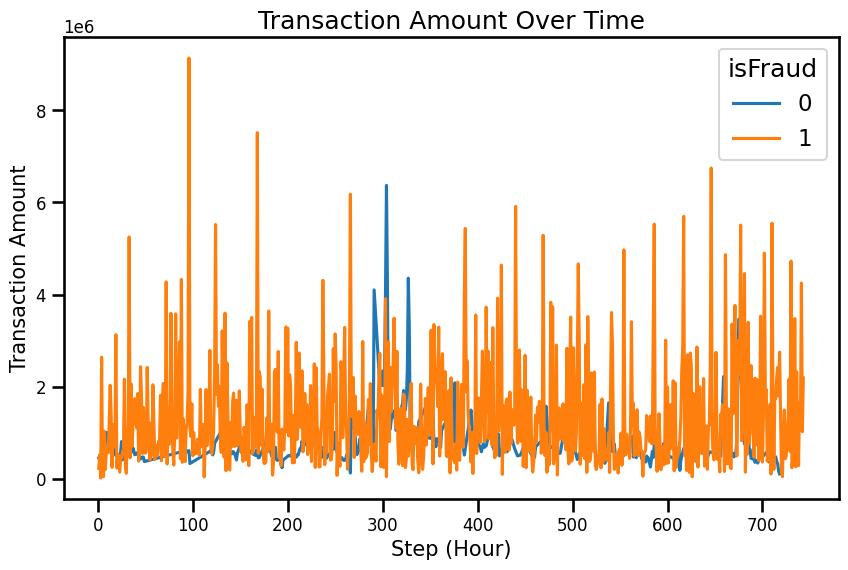

In [18]:
# Transaction count over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='step', y='amount', hue='isFraud', data=transfer, ci=None)
plt.title('Transaction Amount Over Time')
plt.xlabel('Step (Hour)')
plt.ylabel('Transaction Amount')
plt.show()